In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [250]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_log_error, mean_squared_error, root_mean_squared_error, r2_score

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')


print("Train DataFrame head:")
train_df.head()

Train DataFrame head:


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [253]:
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

print("\nTest DataFrame head:")
test_df.head()


Test DataFrame head:


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [254]:
train_df.shape

(7625, 11)

In [255]:
test_df.shape


(625134, 9)

In [256]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7625 non-null   object 
 1   vendor_id           7625 non-null   int64  
 2   pickup_datetime     7625 non-null   object 
 3   dropoff_datetime    7624 non-null   object 
 4   passenger_count     7624 non-null   float64
 5   pickup_longitude    7624 non-null   float64
 6   pickup_latitude     7624 non-null   float64
 7   dropoff_longitude   7624 non-null   float64
 8   dropoff_latitude    7624 non-null   float64
 9   store_and_fwd_flag  7624 non-null   object 
 10  trip_duration       7624 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 655.4+ KB


In [257]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [258]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,7625.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000
mean,1.531016,1.672613,-73.972940,40.750818,-73.973084,40.751895,937.917235
std,0.499070,1.322211,0.039098,0.028277,0.036099,0.032523,3122.352040
min,1.000000,1.000000,-74.209854,40.612793,-74.307762,40.567341,2.000000
25%,1.000000,1.000000,-73.991768,40.737550,-73.991280,40.735348,394.750000
50%,2.000000,1.000000,-73.981754,40.754503,-73.979549,40.754532,657.000000
75%,2.000000,2.000000,-73.966599,40.768224,-73.962379,40.770279,1064.250000
max,2.000000,6.000000,-73.756172,40.874420,-73.593582,41.043865,86357.000000


In [259]:
test_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [260]:
train_df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,1
passenger_count,1
pickup_longitude,1
pickup_latitude,1
dropoff_longitude,1
dropoff_latitude,1
store_and_fwd_flag,1


In [261]:
train_df = train_df.dropna(how = 'any', axis = 0)
train_df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [262]:
test_df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [263]:
train_df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,float64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [264]:
test_df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [265]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], format='mixed')
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'], format='mixed')
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], format='mixed')

train_df.dtypes
test_df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [266]:
train_df['pickup_year'] = train_df['pickup_datetime'].dt.year
train_df['pickup_month'] = train_df['pickup_datetime'].dt.month
train_df['pickup_day'] = train_df['pickup_datetime'].dt.day
train_df['pickup_day_of_week'] = train_df['pickup_datetime'].dt.dayofweek
train_df['pickup_hour'] = train_df['pickup_datetime'].dt.hour

In [267]:
test_df['pickup_year'] = test_df['pickup_datetime'].dt.year
test_df['pickup_month'] = test_df['pickup_datetime'].dt.month
test_df['pickup_day'] = test_df['pickup_datetime'].dt.day
test_df['pickup_day_of_week'] = test_df['pickup_datetime'].dt.dayofweek
test_df['pickup_hour'] = test_df['pickup_datetime'].dt.hour

In [268]:
train_df['lat_diff'] = train_df['dropoff_latitude'] - train_df['pickup_latitude']
train_df['long_diff'] = train_df['dropoff_longitude'] - train_df['pickup_longitude']

test_df['lat_diff'] = test_df['dropoff_latitude'] - test_df['pickup_latitude']
test_df['long_diff'] = test_df['dropoff_longitude'] - test_df['pickup_longitude']

In [269]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

train_df['haversine_distance'] = train_df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
test_df['haversine_distance'] = test_df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [270]:
epsilon = 1e-6
print(epsilon)    # 10^-6
train_df['speed'] = train_df['haversine_distance'] / (train_df['trip_duration'] + epsilon)
train_df['speed'] = train_df['speed'].replace([np.inf, -np.inf], np.nan)


1e-06


In [271]:
def calculate_bearing(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    x = math.sin(dlon) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dlon)
    bearing = math.degrees(math.atan2(x, y))
    return (bearing + 360) % 360

train_df['direction'] = train_df.apply(lambda row: calculate_bearing(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
test_df['direction'] = test_df.apply(lambda row: calculate_bearing(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [272]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_year,pickup_month,pickup_day,pickup_day_of_week,pickup_hour,lat_diff,long_diff,haversine_distance,speed,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,...,2016,3,14,0,17,-0.002335,0.017525,1.498521,0.003293,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,...,2016,6,12,6,0,-0.007412,-0.019066,1.805507,0.002723,242.846232
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,...,2016,1,19,1,11,-0.053852,-0.026306,6.385098,0.003006,200.319835
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,...,2016,4,6,2,19,-0.013252,-0.002228,1.485498,0.003463,187.262300
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,...,2016,3,26,5,13,-0.010689,0.000130,1.188588,0.002732,179.473585


In [273]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_day',
       'pickup_day_of_week', 'pickup_hour', 'lat_diff', 'long_diff',
       'haversine_distance', 'speed', 'direction'],
      dtype='object')

In [274]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,pickup_month,pickup_day,pickup_day_of_week,pickup_hour,lat_diff,long_diff,haversine_distance,direction
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016,6,30,3,23,0.024651,-0.002045,2.746426,356.404776
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016,6,30,3,23,-0.024590,0.004395,2.759239,172.278835
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016,6,30,3,23,-0.008060,0.011276,1.306155,133.326248
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016,6,30,3,23,-0.041431,-0.030357,5.269088,209.043167
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016,6,30,3,23,-0.005585,0.008705,0.960842,130.260381


In [275]:
test_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_day_of_week', 'pickup_hour', 'lat_diff',
       'long_diff', 'haversine_distance', 'direction'],
      dtype='object')

In [276]:
train_df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
dropoff_datetime,datetime64[ns]
passenger_count,float64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [277]:
train_df['pickup_year']

,pickup_year
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
7619,2016
7620,2016
7621,2016
7622,2016


In [278]:

numeric_df = train_df.select_dtypes(include=np.number)

std_devs = numeric_df.std()

zero_variance_cols = std_devs[std_devs == 0].index.tolist()

if len(zero_variance_cols) > 0:
    print("Found columns with zero variance:")
    print(zero_variance_cols)
    train_df.drop(columns=zero_variance_cols, inplace=True)
else:
    print("No columns with zero variance were found.")

Found columns with zero variance:
['pickup_year']


Total number of missing values in the correlation matrix: 0


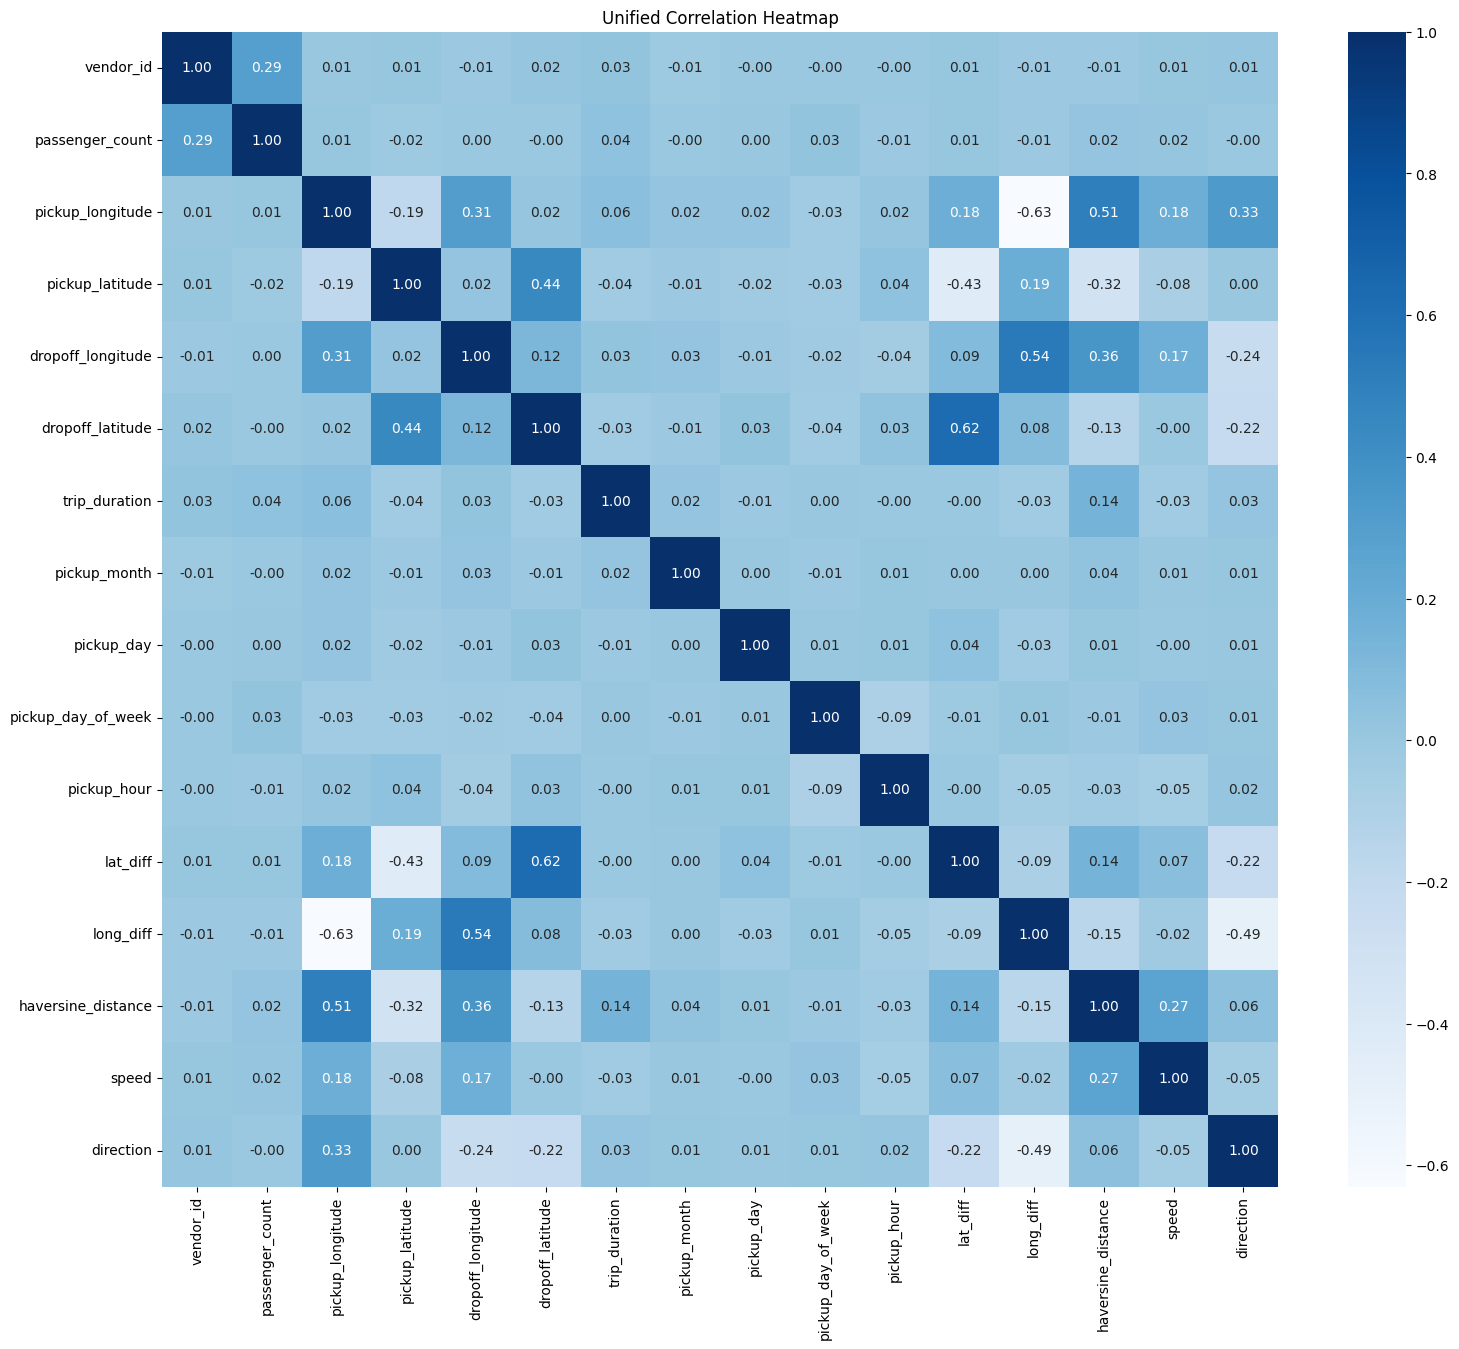

In [279]:
plt.figure(figsize=(18, 15))

corr_matrix = train_df.corr(numeric_only=True)

nan_count = corr_matrix.isnull().sum().sum()
print(f"Total number of missing values in the correlation matrix: {nan_count}")

sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')

plt.title('Unified Correlation Heatmap')
plt.show()

In [280]:
numeric_df = test_df.select_dtypes(include=np.number)

std_devs = numeric_df.std()

zero_variance_cols = std_devs[std_devs == 0].index.tolist()

if len(zero_variance_cols) > 0:
    print("Found columns with zero variance:")
    print(zero_variance_cols)
    test_df.drop(columns=zero_variance_cols, inplace=True)
else:
    print("No columns with zero variance were found.")

Found columns with zero variance:
['pickup_year']


Total number of missing values in the correlation matrix: 0


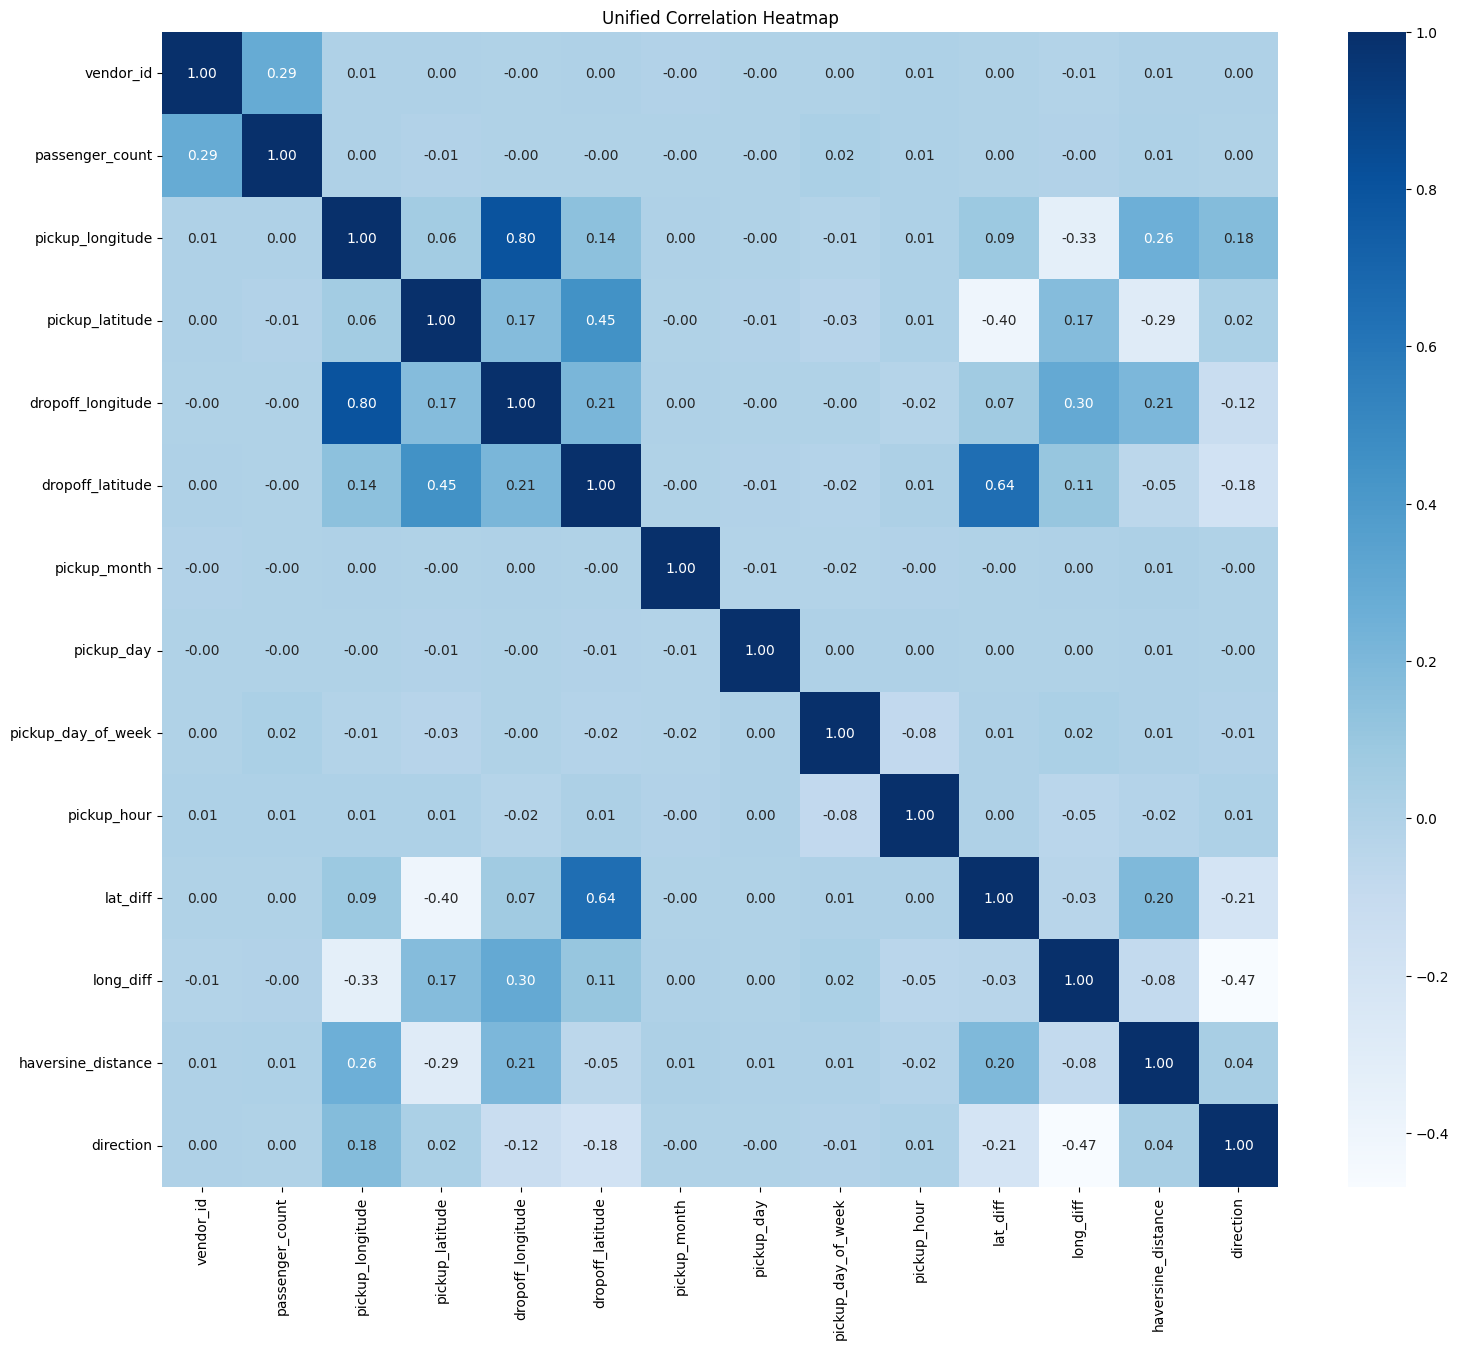

In [281]:
plt.figure(figsize=(18, 15))

corr_matrix = test_df.corr(numeric_only=True)

nan_count = corr_matrix.isnull().sum().sum()
print(f"Total number of missing values in the correlation matrix: {nan_count}")

sns.heatmap(test_df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')

plt.title('Unified Correlation Heatmap')
plt.show()

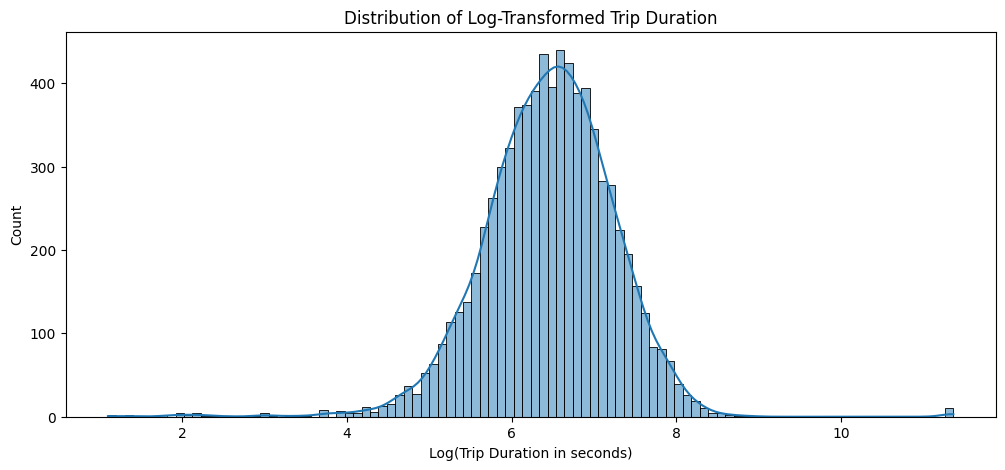

In [282]:
# --- Distribution of Trip Duration ---

plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(train_df['trip_duration']), bins=100, kde=True)
plt.title('Distribution of Log-Transformed Trip Duration')
plt.xlabel('Log(Trip Duration in seconds)')
plt.show()


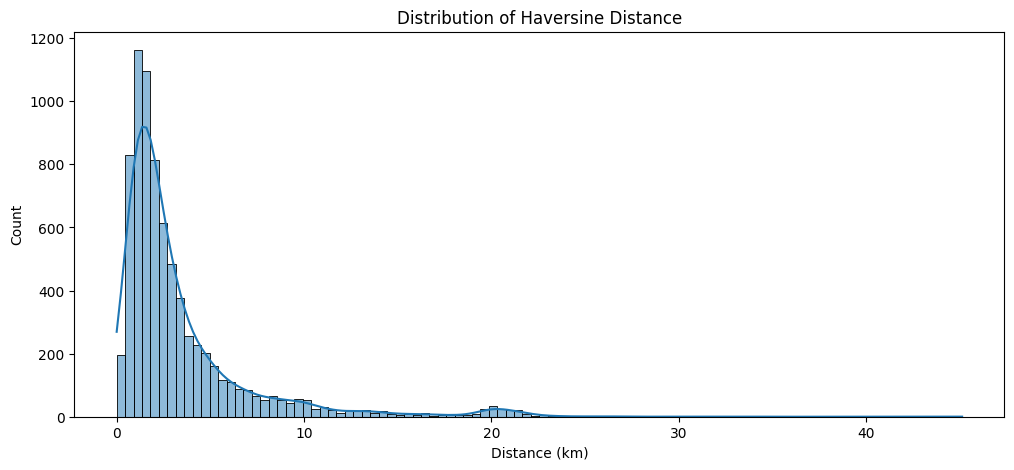

In [283]:

# --- Distribution of Haversine Distance ---
plt.figure(figsize=(12, 5))
sns.histplot(train_df['haversine_distance'], bins=100, kde=True)
plt.title('Distribution of Haversine Distance')
plt.xlabel('Distance (km)')
plt.show()

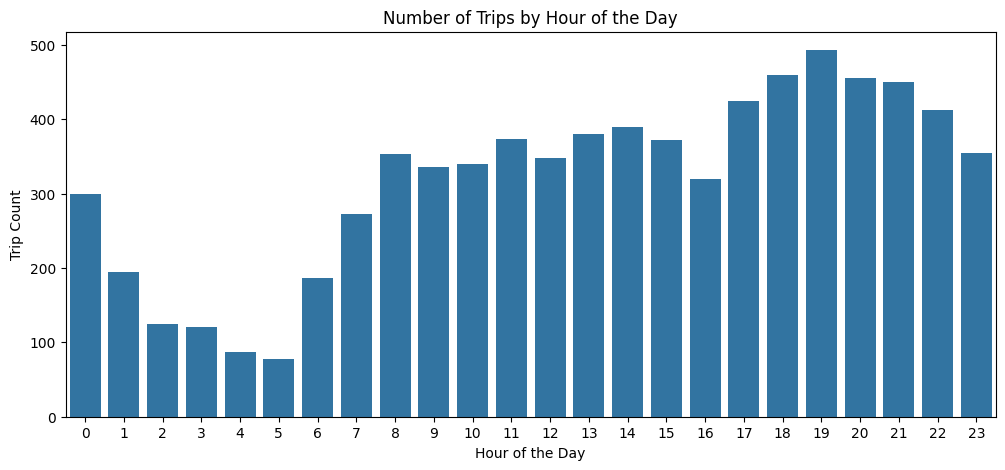

In [284]:
# --- Trip Counts by Hour of the Day ---
plt.figure(figsize=(12, 5))
sns.countplot(x='pickup_hour', data=train_df)
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Count')
plt.show()


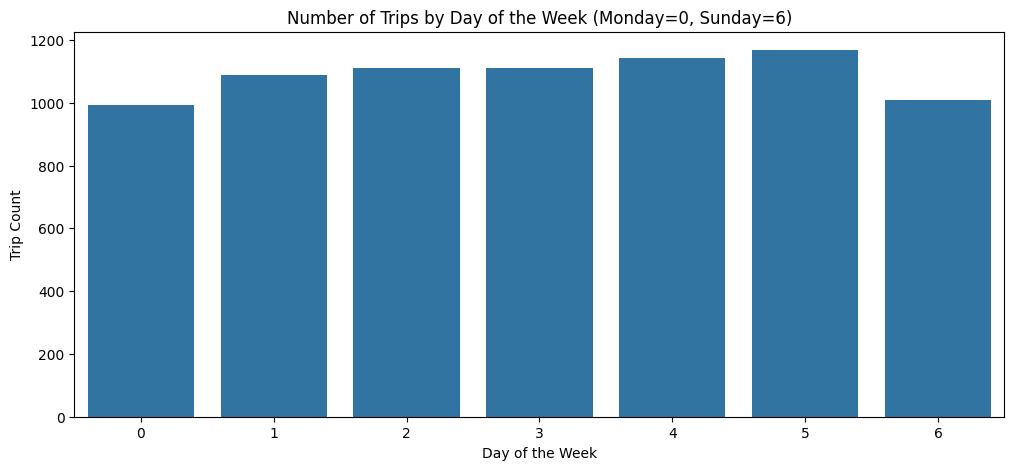

In [285]:

# --- Trip Counts by Day of the Week ---
plt.figure(figsize=(12, 5))
sns.countplot(x='pickup_day_of_week', data=train_df)
plt.title('Number of Trips by Day of the Week (Monday=0, Sunday=6)')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Count')
plt.show()

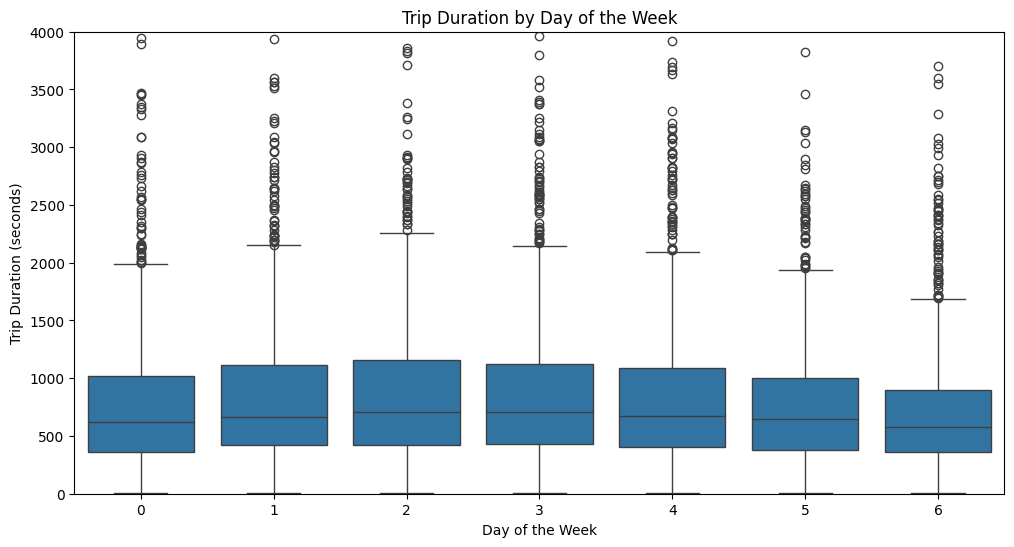

In [286]:
# --- Trip Duration vs. Day of the Week ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_day_of_week', y='trip_duration', data=train_df)
plt.title('Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Duration (seconds)')
# Limiting y-axis for better readability due to outliers
plt.ylim(0, 4000)
plt.show()


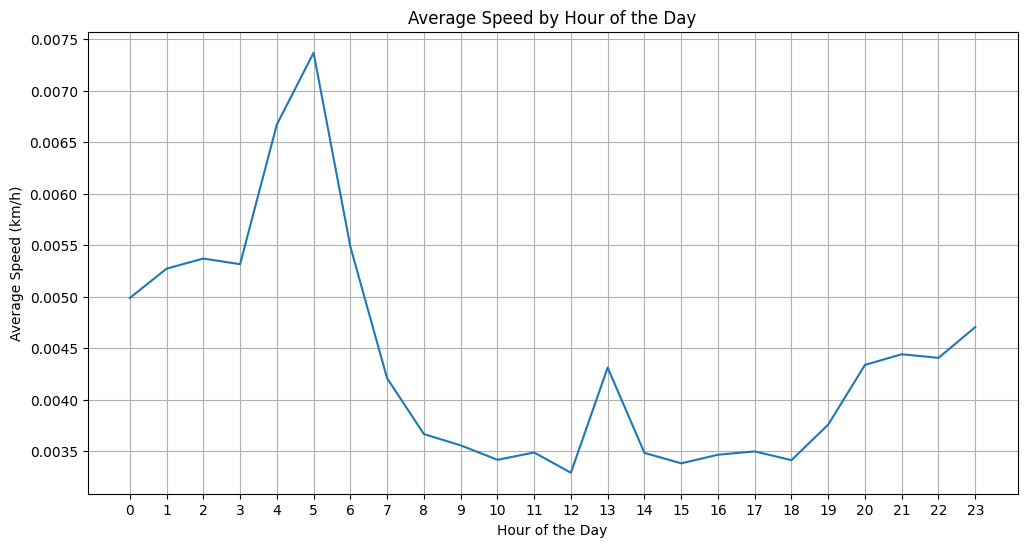

In [287]:

# --- Average Speed vs. Hour of the Day ---
# Group by hour and calculate the mean speed
avg_speed_by_hour = train_df.groupby('pickup_hour')['speed'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='speed', data=avg_speed_by_hour)
plt.title('Average Speed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

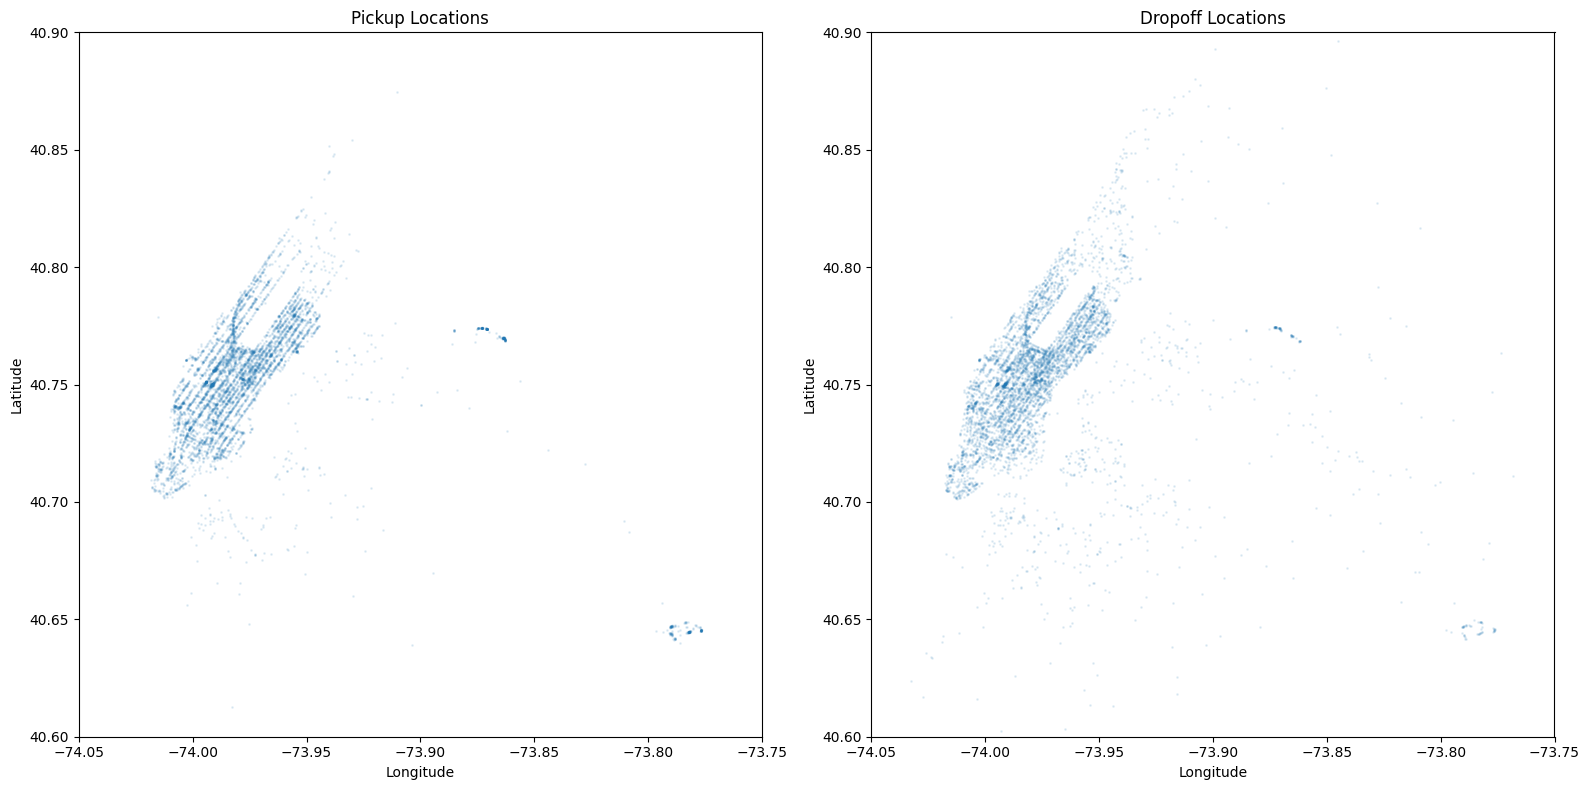

In [288]:
# --- Pickup and Dropoff Locations ---

train_df_sample = train_df.sample(frac=0.8, random_state=42)

# Define NYC coordinate boundaries for a clean plot
nyc_bounds = (-74.05, -73.75, 40.6, 40.9)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Pickup Locations
axs[0].scatter(train_df_sample['pickup_longitude'], train_df_sample['pickup_latitude'], alpha=0.1, s=1)
axs[0].set_title('Pickup Locations')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_xlim(nyc_bounds[0], nyc_bounds[1])
axs[0].set_ylim(nyc_bounds[2], nyc_bounds[3])

# Dropoff Locations
axs[1].scatter(train_df_sample['dropoff_longitude'], train_df_sample['dropoff_latitude'], alpha=0.1, s=1)
axs[1].set_title('Dropoff Locations')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_xlim(nyc_bounds[0], nyc_bounds[1])
axs[1].set_ylim(nyc_bounds[2], nyc_bounds[3])

plt.tight_layout()
plt.show()

In [289]:
import folium
from folium.plugins import HeatMap

nyc_map = folium.Map(location=[40.75, -73.98], zoom_start=11)

heat_data = train_df[['pickup_latitude', 'pickup_longitude']].values.tolist()


HeatMap(heat_data, radius=8).add_to(nyc_map)

nyc_map

--- Visualizing Outliers Before Removal ---

Column 'trip_duration' has 388 outliers. Plotting...


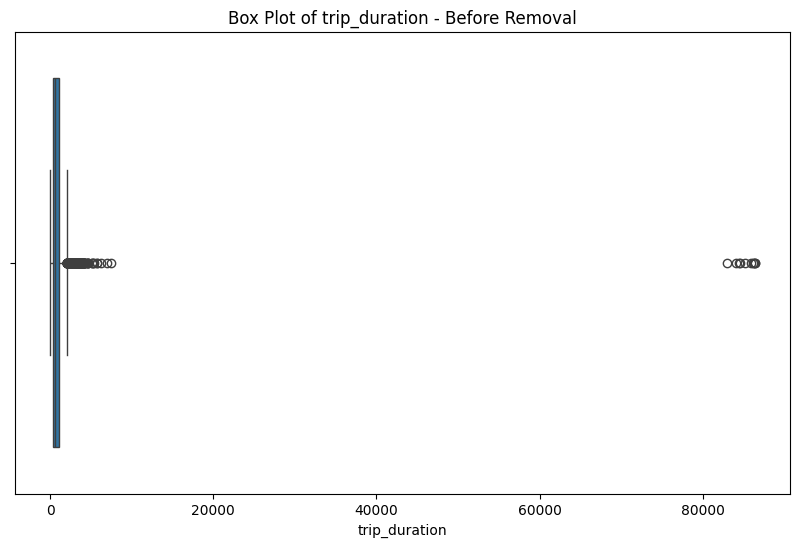


Column 'haversine_distance' has 739 outliers. Plotting...


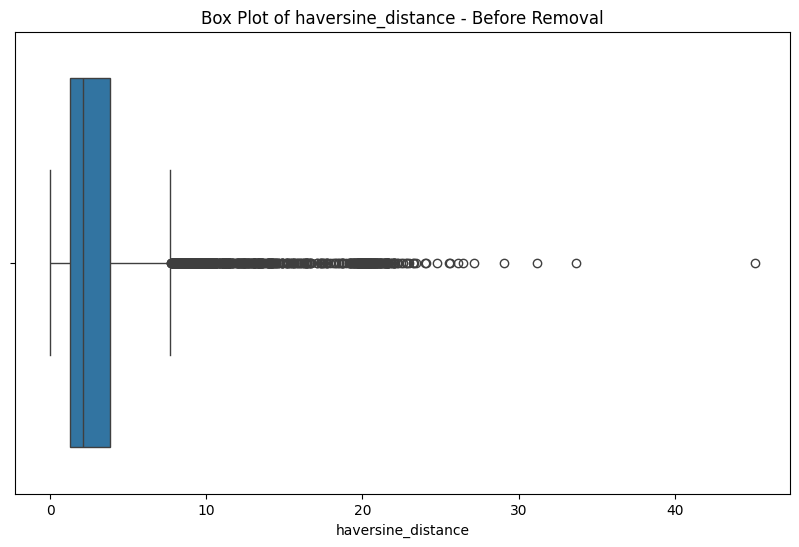


Column 'speed' has 330 outliers. Plotting...


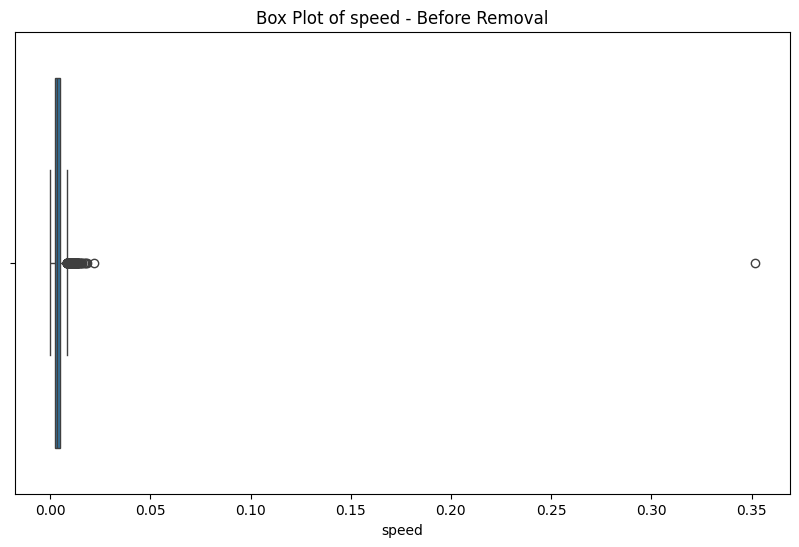


Column 'passenger_count' has 836 outliers. Plotting...


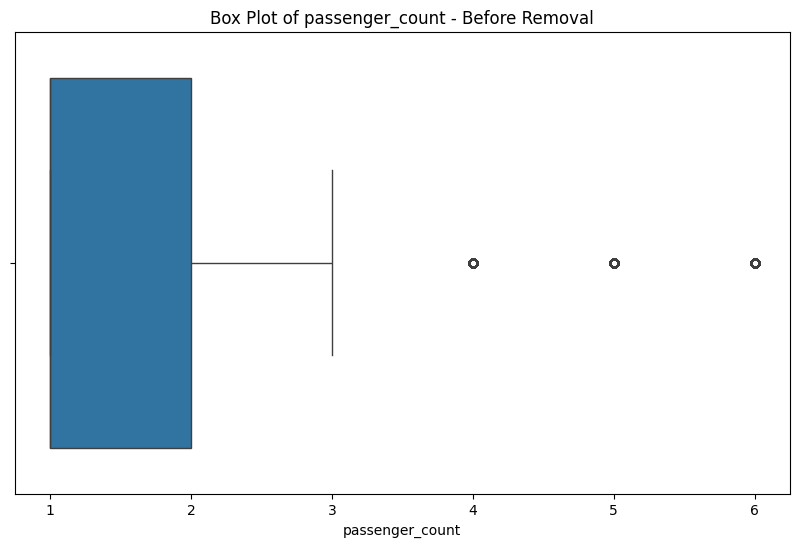


--- Removing Outliers Based on Practical Rules ---
Original data shape: (7624, 20)
Data shape after removing outliers: (7529, 20)

--- Visualizing Data After Removal ---


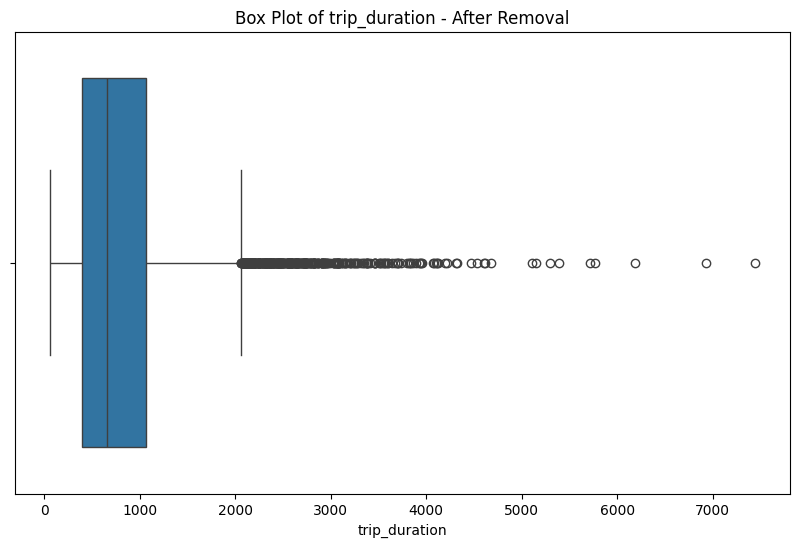

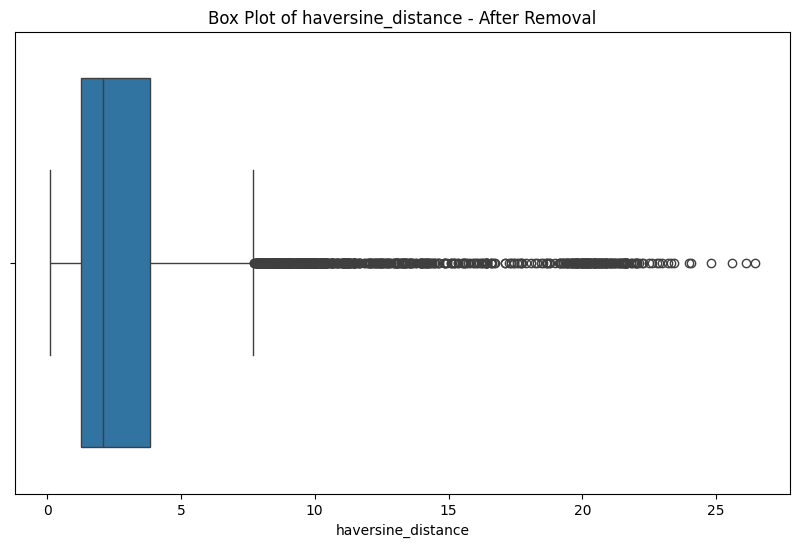

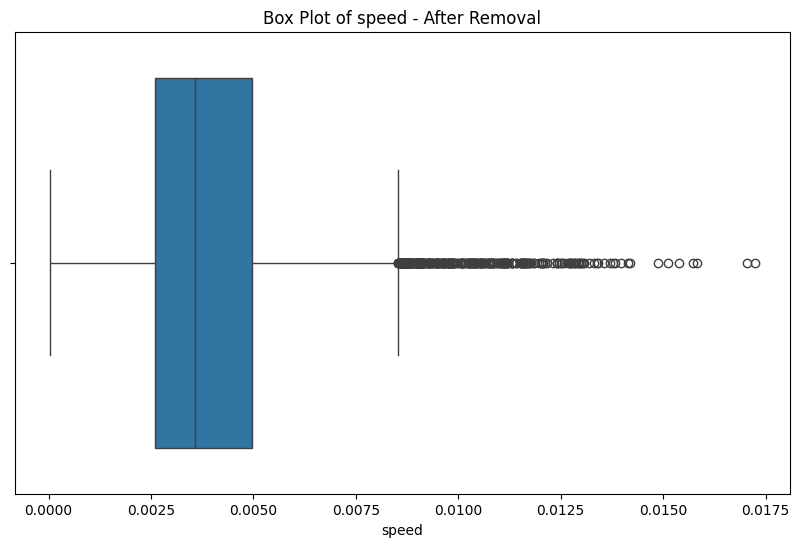

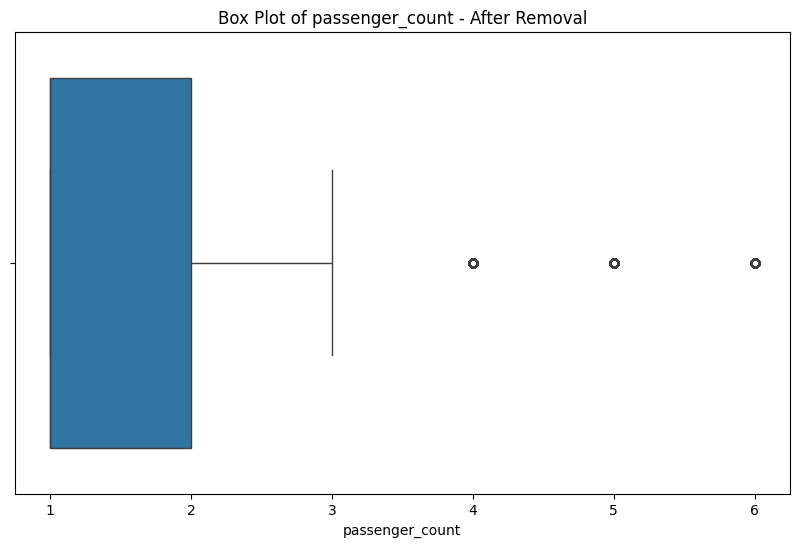

In [290]:


columns_to_check = ['trip_duration', 'haversine_distance', 'speed', 'passenger_count']

# --- Step 1: Find and Plot Outliers in the ORIGINAL Data ---
print("--- Visualizing Outliers Before Removal ---")

for col in columns_to_check:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)].shape[0]

    if outlier_count > 0:
        print(f"\nColumn '{col}' has {outlier_count} outliers. Plotting...")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=train_df[col])
        plt.title(f'Box Plot of {col} - Before Removal')
        plt.show()

# --- Step 2: Handle Outliers by Removal ---
print("\n--- Removing Outliers Based on Practical Rules ---")
print(f"Original data shape: {train_df.shape}")

train_df_cleaned = train_df.copy()

# Apply removal rules
train_df_cleaned = train_df_cleaned[(train_df_cleaned['trip_duration'] > 60) & (train_df_cleaned['trip_duration'] < 10800)]
train_df_cleaned = train_df_cleaned[(train_df_cleaned['haversine_distance'] > 0.1) & (train_df_cleaned['haversine_distance'] < 100)]
train_df_cleaned = train_df_cleaned[(train_df_cleaned['speed'] > 0) & (train_df_cleaned['speed'] < 100)]
train_df_cleaned = train_df_cleaned[(train_df_cleaned['passenger_count'] > 0) & (train_df_cleaned['passenger_count'] < 7)]
nyc_bounds = {
    'min_lon': -74.25, 'max_lon': -73.7,
    'min_lat': 40.5,  'max_lat': 40.9
}
train_df_cleaned = train_df_cleaned[
    (train_df_cleaned['pickup_longitude'] >= nyc_bounds['min_lon']) & (train_df_cleaned['pickup_longitude'] <= nyc_bounds['max_lon']) &
    (train_df_cleaned['pickup_latitude'] >= nyc_bounds['min_lat']) & (train_df_cleaned['pickup_latitude'] <= nyc_bounds['max_lat']) &
    (train_df_cleaned['dropoff_longitude'] >= nyc_bounds['min_lon']) & (train_df_cleaned['dropoff_longitude'] <= nyc_bounds['max_lon']) &
    (train_df_cleaned['dropoff_latitude'] >= nyc_bounds['min_lat']) & (train_df_cleaned['dropoff_latitude'] <= nyc_bounds['max_lat'])
]

print(f"Data shape after removing outliers: {train_df_cleaned.shape}")


# --- Step 3: Visualize the CLEANED Data ---
print("\n--- Visualizing Data After Removal ---")

for col in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df_cleaned[col])
    plt.title(f'Box Plot of {col} - After Removal')
    plt.show()

Original test_df shape: (625134, 17)

--- Capping Outliers in Test Set ---
Capped outliers in 'haversine_distance' to be within (0.1, 100)
Capped outliers in 'passenger_count' to be within (1, 6)
Capped outliers in 'pickup_longitude' to be within (-74.25, -73.7)
Capped outliers in 'pickup_latitude' to be within (40.5, 40.9)
Capped outliers in 'dropoff_longitude' to be within (-74.25, -73.7)
Capped outliers in 'dropoff_latitude' to be within (40.5, 40.9)

Cleaned test_df shape: (625134, 17) (No rows were removed)

--- Visualizing Cleaned Test Data ---


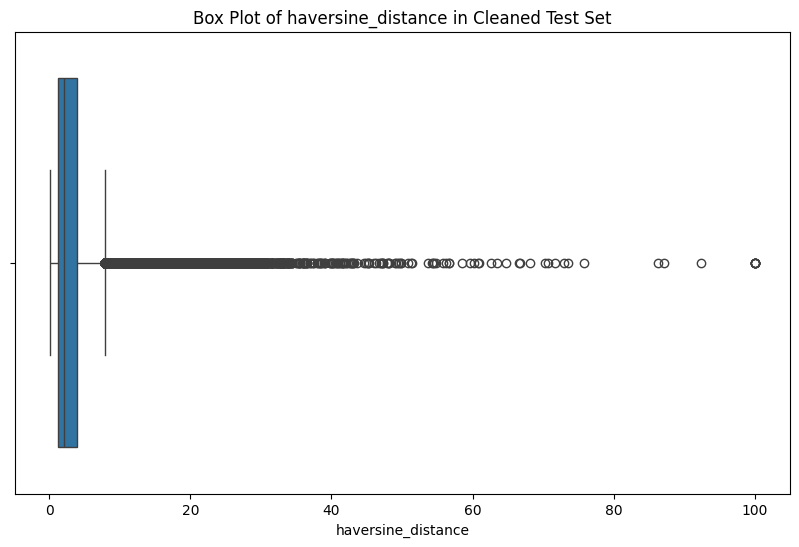

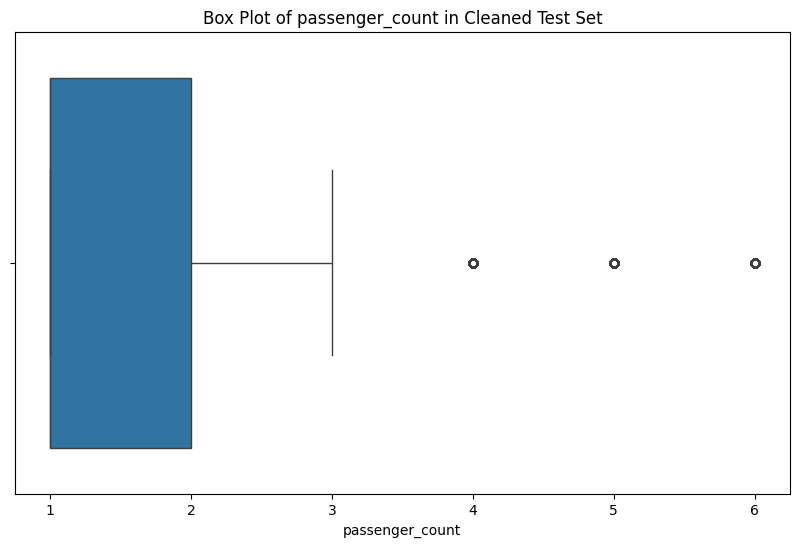

In [291]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Define the Boundaries (Based on Training Data Rules) ---
# These are the same practical rules you used for the training set.
bounds = {
    'haversine_distance': {'lower': 0.1, 'upper': 100},
    'passenger_count': {'lower': 1, 'upper': 6},
    'pickup_longitude': {'lower': -74.25, 'upper': -73.7},
    'pickup_latitude': {'lower': 40.5, 'upper': 40.9},
    'dropoff_longitude': {'lower': -74.25, 'upper': -73.7},
    'dropoff_latitude': {'lower': 40.5, 'upper': 40.9}
}

# --- Step 2: Handle Outliers in test_df by Capping ---
print(f"Original test_df shape: {test_df.shape}")

# Create a cleaned copy
test_df_cleaned = test_df.copy()

print("\n--- Capping Outliers in Test Set ---")
for col, limits in bounds.items():
    # Use the .clip() method to cap the values
    original_min = test_df_cleaned[col].min()
    original_max = test_df_cleaned[col].max()

    test_df_cleaned[col] = test_df_cleaned[col].clip(lower=limits['lower'], upper=limits['upper'])

    # Report if any changes were made
    if test_df_cleaned[col].min() > original_min or test_df_cleaned[col].max() < original_max:
        print(f"Capped outliers in '{col}' to be within ({limits['lower']}, {limits['upper']})")

print(f"\nCleaned test_df shape: {test_df_cleaned.shape} (No rows were removed)")


# --- Step 3: Visualize the CLEANED Test Data ---
# Note: 'trip_duration' and 'speed' are not in the test set.
columns_to_visualize = ['haversine_distance', 'passenger_count']

print("\n--- Visualizing Cleaned Test Data ---")
for col in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=test_df_cleaned[col])
    plt.title(f'Box Plot of {col} in Cleaned Test Set')
    plt.show()

In [292]:
train_df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
dropoff_datetime,datetime64[ns]
passenger_count,float64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [293]:
test_df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object
pickup_month,int32


In [294]:
categorical_features = ['vendor_id', 'store_and_fwd_flag']
numerical_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

engineered_numerical_features = ['passenger_count', 'haversine_distance', 'direction', 'lat_diff', 'long_diff',
                                'pickup_month', 'pickup_day', 'pickup_day_of_week', 'pickup_hour']
numerical_features.extend(engineered_numerical_features)

features = [f for f in categorical_features + numerical_features if f in train_df.columns]


In [295]:
X = train_df[features]
y = np.log1p(train_df['trip_duration'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01)
}

In [296]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

X_train_cat_processed = pd.DataFrame(ohe.fit_transform(X_train[categorical_features]), index=X_train.index)
X_train_num_processed = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), index=X_train.index, columns=numerical_features)

X_valid_cat_processed = pd.DataFrame(ohe.transform(X_valid[categorical_features]), index=X_valid.index)
X_valid_num_processed = pd.DataFrame(scaler.transform(X_valid[numerical_features]), index=X_valid.index, columns=numerical_features)

X_train_processed = pd.concat([X_train_num_processed, X_train_cat_processed], axis=1)
X_valid_processed = pd.concat([X_valid_num_processed, X_valid_cat_processed], axis=1)

X_train_processed = X_train_processed.values
X_valid_processed = X_valid_processed.values

In [297]:
results = {}

for name, model in models.items():
    model.fit(X_train_processed, y_train)

    pred_log = model.predict(X_valid_processed)

    y_valid_orig = np.expm1(y_valid)
    pred_orig = np.expm1(pred_log)
    pred_orig[pred_orig < 0] = 0

    rmsle = np.sqrt(mean_squared_log_error(y_valid_orig, pred_orig))
    results[name] = {'rmsle': rmsle}
    print(f'{name} -> RMSLE: {rmsle:.5f}')

LinearRegression -> RMSLE: 0.58307
Ridge -> RMSLE: 0.58308
Lasso -> RMSLE: 0.58593


In [298]:
features = [f for f in X_train.columns if f in test_df.columns]
X_test = test_df[features]

X_test_cat_processed = pd.DataFrame(ohe.transform(X_test[categorical_features]), index=X_test.index)

X_test_num_processed = pd.DataFrame(scaler.transform(X_test[numerical_features]), index=X_test.index, columns=numerical_features)

X_test_processed = pd.concat([X_test_num_processed, X_test_cat_processed], axis=1)

X_test_processed = X_test_processed.values


In [301]:
ridge_model = Ridge(alpha=1.0).fit(X_train_processed, y_train)
lasso_model = Lasso(alpha=0.01).fit(X_train_processed, y_train)

In [302]:

ridge_pred_log = ridge_model.predict(X_test_processed)
lasso_pred_log = lasso_model.predict(X_test_processed)

ridge_predictions = np.expm1(ridge_pred_log)
lasso_predictions = np.expm1(lasso_pred_log)

ridge_predictions[ridge_predictions < 0] = 0
lasso_predictions[lasso_predictions < 0] = 0

In [303]:
ridge_submission = pd.DataFrame({'id': test_df['id'], 'trip_duration': ridge_predictions})

lasso_submission = pd.DataFrame({'id': test_df['id'], 'trip_duration': lasso_predictions})

In [304]:
ridge_submission

,id,trip_duration
0,id3004672,733.960910
1,id3505355,572.427886
2,id1217141,569.581372
3,id2150126,988.697551
4,id1598245,482.978551
...,...,...
625129,id3008929,394.658085
625130,id3700764,837.130892
625131,id2568735,943.084959
625132,id1384355,5117.399856


In [305]:
lasso_submission

,id,trip_duration
0,id3004672,685.740712
1,id3505355,575.095954
2,id1217141,549.828663
3,id2150126,924.551710
4,id1598245,472.997438
...,...,...
625129,id3008929,430.256864
625130,id3700764,875.783828
625131,id2568735,991.596064
625132,id1384355,5091.642653


In [306]:
ridge_submission.to_csv('ridge_submission.csv', index=False)

In [307]:
lasso_submission.to_csv('lasso_submission.csv', index=False)